# **(ADD HERE THE NOTEBOOK NAME)**

## Objectives

* To cary out an EDA using Pandas profiling and correlation studies in order to answer business requirement 1:

   -  The client is interested in identifying the key factors that contribute to patients readmissions. 

## Inputs

* outputs/dataset/collection/HospitalReadmissions.csv 

## Outputs

* Plots for the dashboard.

## Additional Comments

* In case you have any additional comments that don't fit in the previous bullets, please state them here. 


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Andrias\\Desktop\\patient-readmission\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Andrias\\Desktop\\patient-readmission'

---

# Load the dataset

Load the dataset that was saved at the end of the previous notebook.

In [4]:
import pandas as pd

df = pd.read_csv("outputs/datasets/collection/HospitalReadmissions.csv")
df.head()

age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 glucose_test A1Ctest change diabetes_med  \
0  Respiratory        Other           no      no     no          yes   
1        Other        Other           no      no     no          yes   
2  Circulatory  Circulatory           no      no    yes          yes   
3        Other     Diabetes           no      no    yes          yes   
4  Circulatory  Respiratory           no      no     no          yes   

   readmitted  
0           0  
1           0  
2           1  
3           1  
4           0

---

# Pandas Profiling

In order to better understand the dataset, data profiling is carried out using the ProfileReport class from the ydata_profiling library.

This will give an overview of the dataset and it's characteristics, analyse the features using statistical methods and investigate relationships between features

From the overview, we can see that there are no missing values or duplicated rows and there are 9 alerts.

* As we saw in the previous notebook the variable "medical_specialty" has no actual missing values, however nearly half of the rows are labelled "Missing", which potentially we may consider, later on, dropping this variable.
* In the alerts section we can see that "glucose_test" and "A1Ctest" are imbalanced, so potentially, we will need to apply feature scaling and engineering.
* Also the n_emergency is highly skewed and contains a lot of zeros, which will also need feature scaling and engineering. 
* Moving further down to the Correlations, we see the highest correlation between 2 variables, "change" and "diabetes_med" and we can see low to moderate correlation between out target variable, "readmitted", and the "n_inpatients" variable. This might indicate that we might struggle to find correlate features for our target variable. 
 

In [5]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Analysis of Features

Before we assess the correlation levels between our target variable and the features, we will first analyse the dataset's features.

* First we will identify outliers using visualization and statistical methods and then handle them using appropriate techniques.
   - The techniques we will consider base on the analysis are to Remove the Outliers, Apply transformations or use the Winsorizer technique. 

* Then we will check the categorical features by plotting graphs. 

### Check for outliers

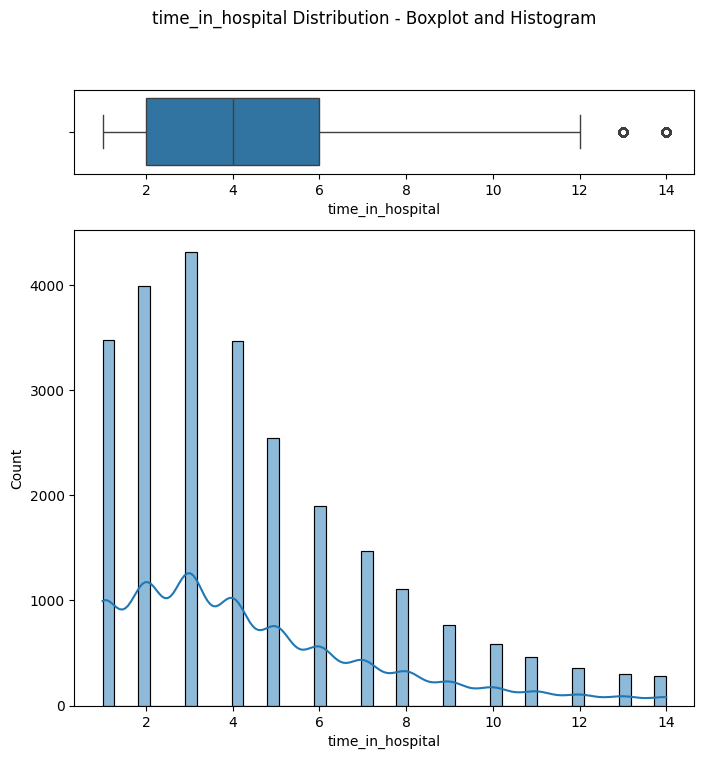

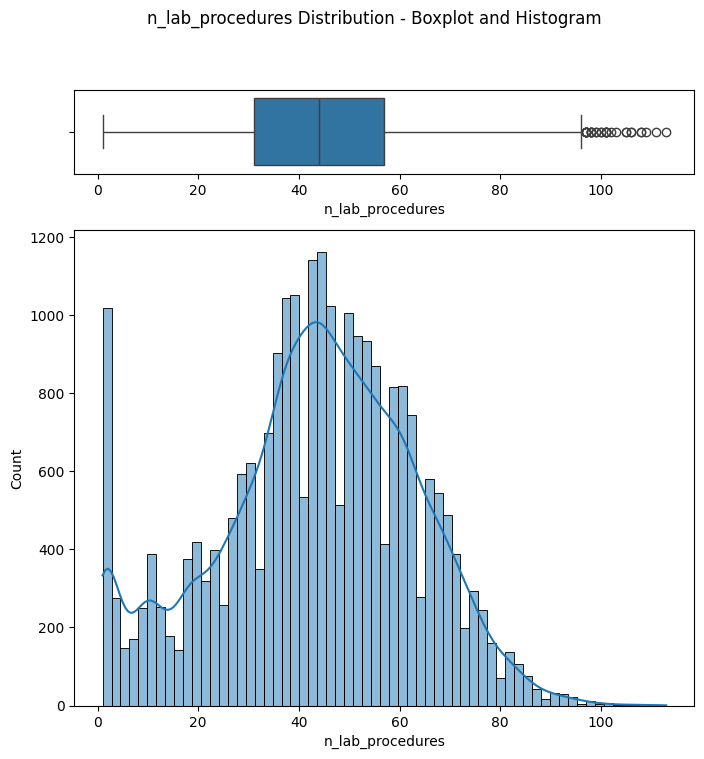

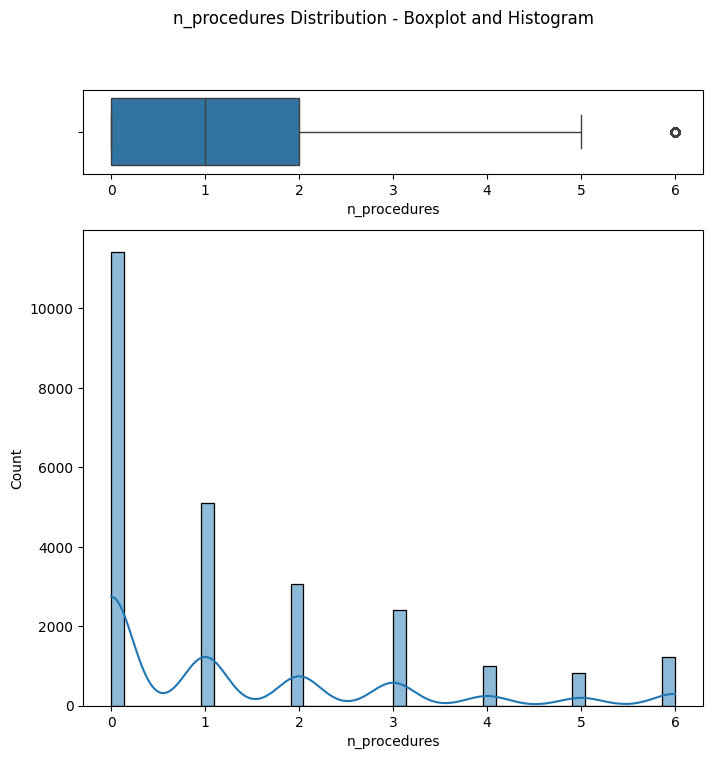

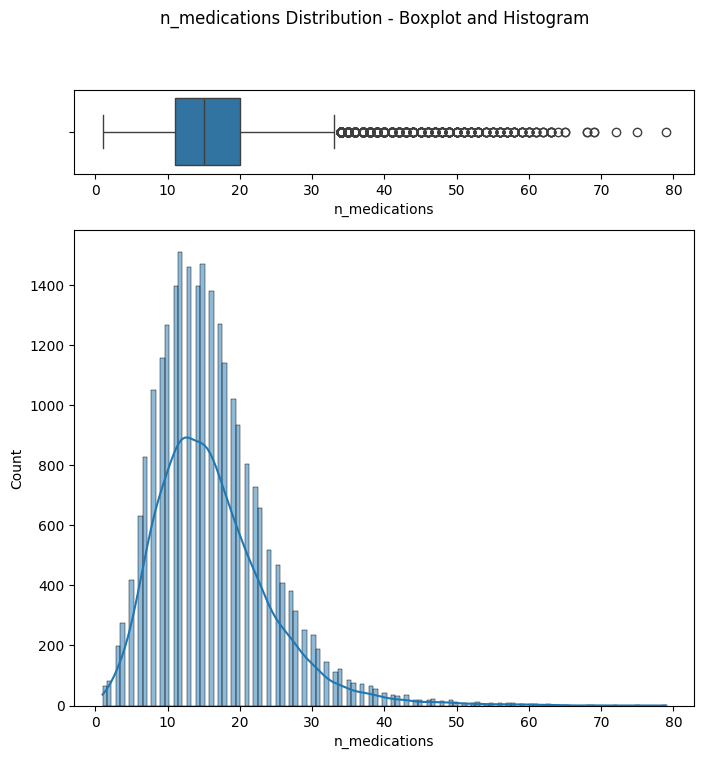

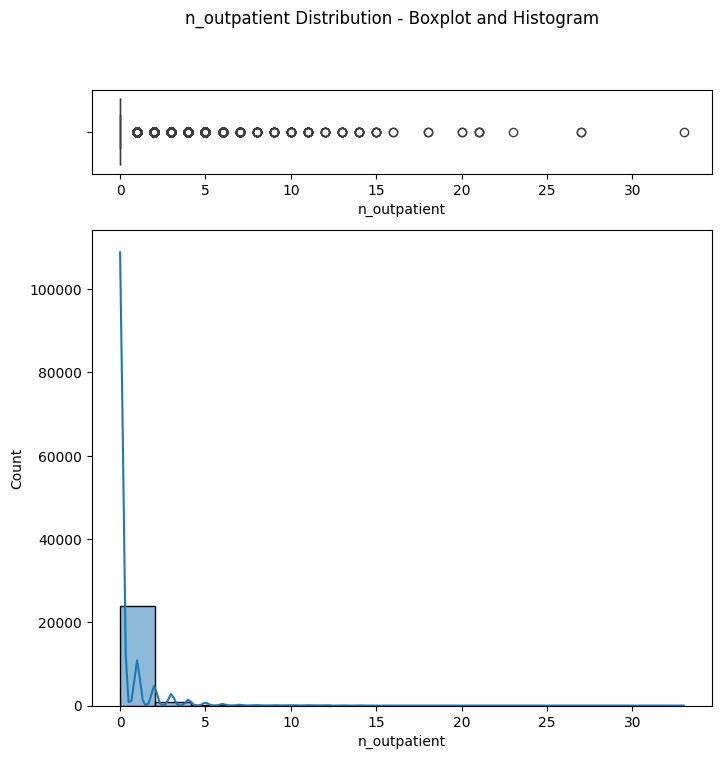

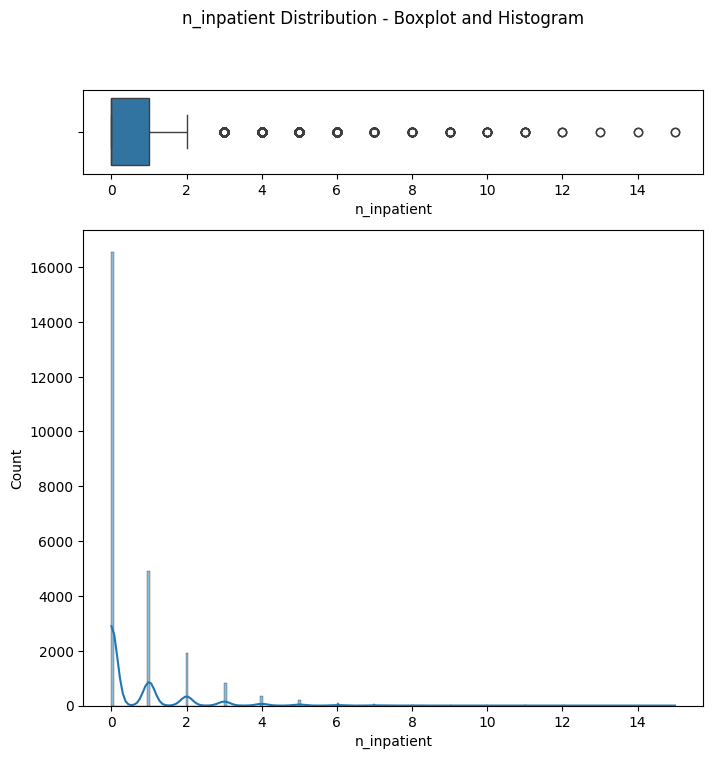

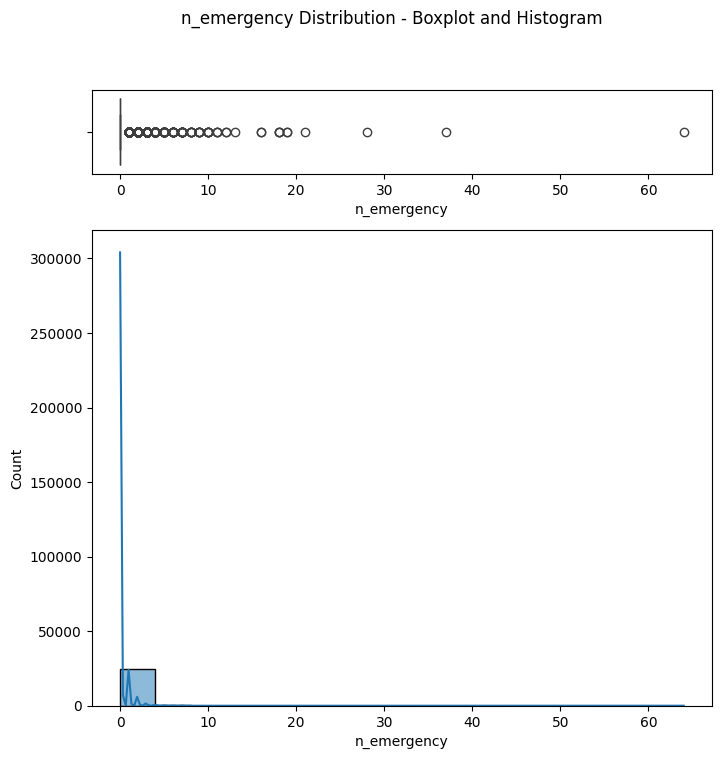

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

no_target_df = df.drop("readmitted", axis=1)

for col in no_target_df.select_dtypes(include="number").columns:
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8,8), gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(data=df, x=col, ax=axes[0])
    sns.histplot(data=df, x=col, kde=True, ax=axes[1])
    fig.suptitle(f"{col} Distribution - Boxplot and Histogram")
    plt.show()
    print("\n")

The boxplots and histograms reveal tha the dataset contains a significant number of outliers, particularly in the columns "n_outpatient", "n_inpatient" and "n_emergency".

### Categorical features

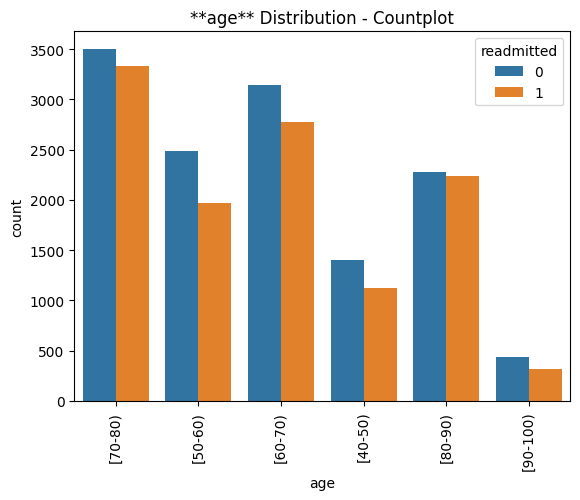

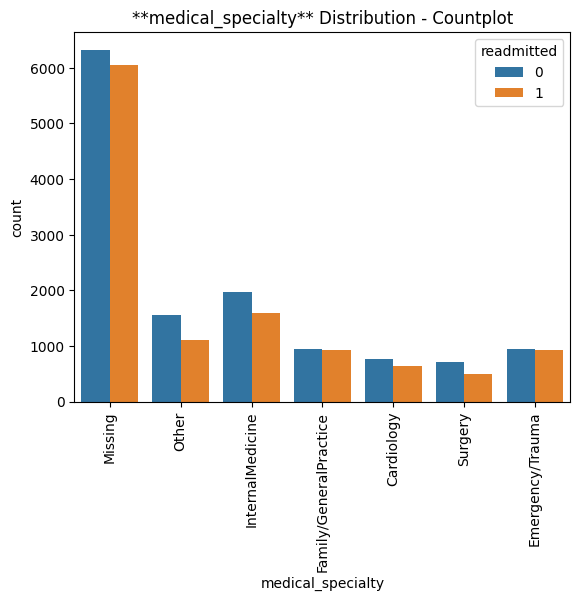

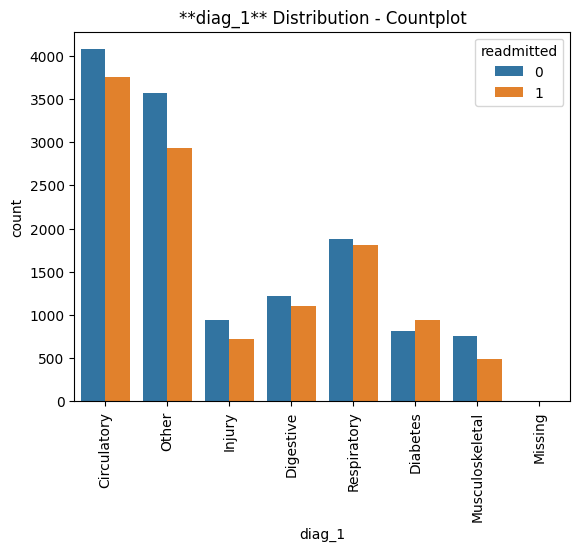

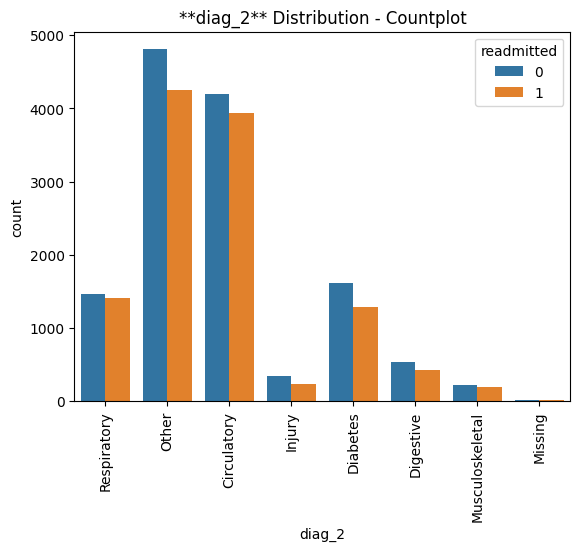

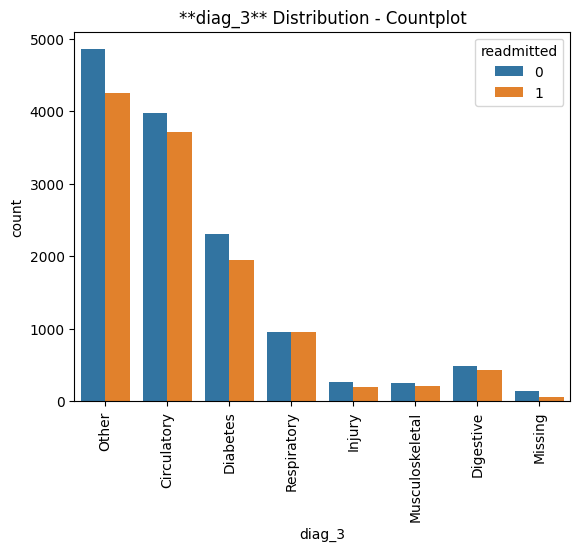

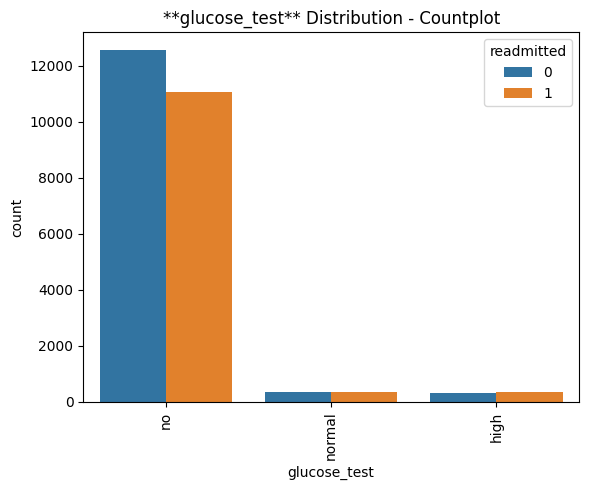

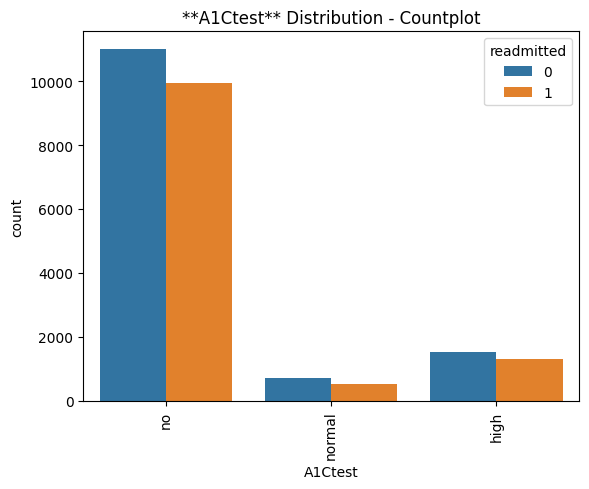

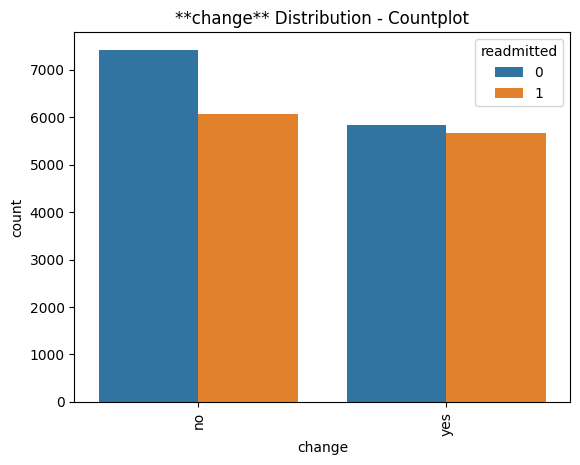

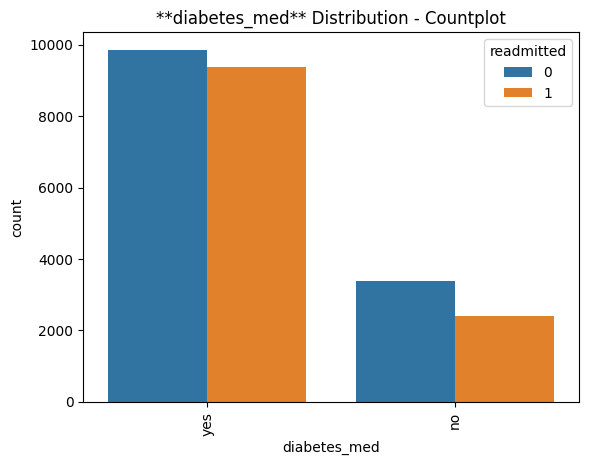

In [13]:
categorical_features = no_target_df.select_dtypes(include="object").columns

for col in cat_feats:
    sns.countplot(data=df, x=col, hue="readmitted")
    plt.title(f"**{col}** Distribution - Countplot")
    plt.xticks(rotation=90)
    plt.show()
    print("\n")

### Correlation Study

In [ ]:
from feature_engine.encoding import OneHotEncoder

ohe = OneHotEncoder(variables=categorical_features, drop_last=True)
df_ohe = ohe.fit_transform(df)
df_ohe.head()

In [ ]:
corr_spearman = df_ohe.corr(method="spearman")["readmitted"].sort_values(ascending=False, key=abs)[1:]
corr_spearman

In [ ]:
corr_pearson = df_ohe.corr(method="pearson")["readmitted"].sort_values(ascending=False, key=abs)[1:]
corr_pearson

In [ ]:
top_n = 5
most_correlated_features = set(corr_spearman[:top_n].index.to_list() + corr_pearson[:top_n].index.to_list())
most_correlated_features

### Predictive Power Score

In [ ]:
import ppscore as pps

pps.matrix(df)

In [ ]:
matrix_df = pps.matrix(df)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

---

# Push files to Repo

* In case you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create here your folder
  # os.makedirs(name='')
except Exception as e:
  print(e)


---

## Conclusions

## Next Steps